# Scraping Data from a Real Website + Pandas

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'https://en.wikipedia.org/wiki/Jollibee'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html lang="en-PH"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>concord honda - Google Search</title><script nonce="kUbVJv46LdYhS0UWkgwlyg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?
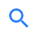
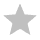
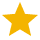

In [46]:
print(soup)

In [4]:
soup.find('table')

<table class="box-Multiple_issues plainlinks metadata ambox ambox-content ambox-multiple_issues compact-ambox" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><span typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="40" data-file-width="40" decoding="async" height="40" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/40px-Ambox_important.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/60px-Ambox_important.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b4/Ambox_important.svg/80px-Ambox_important.svg.png 2x" width="40"/></span></span></div></td><td class="mbox-text"><div class="mbox-text-span"><div class="multiple-issues-text mw-collapsible"><b>This article has multiple issues.</b> Please help <b><a href="/wiki/Special:EditPage/Jollibee" title="Special:EditPage/Jollibee">improve it</a></b> or discuss these issues on the <b><a href="/wiki/Talk:Jollibee" title="

In [36]:

table = soup.find_all('table', class_='wikitable plainrowheaders')
for table in table:
    #print(table.prettify())
    if table:
        # Find all 'th' elements within the table
        jolliTable = table.find_all('tr')[0]
        for header in jolliTable:
            print(header.text)
    else:
        print("Table not found")



Name



Year introduced



Year discontinued



Representation



In [29]:
soup.find('table', class_ = 'wikitable sortable')


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [30]:
table = soup.find_all('table')[1]

In [25]:
print(table)

[<table class="wikitable plainrowheaders">
<tbody><tr>
<th scope="col">Name
</th>
<th scope="col">Year introduced
</th>
<th scope="col">Year discontinued
</th>
<th scope="col">Representation
</th></tr>
<tr>
<th scope="row"><b>Jollibee</b>
</th>
<td>1980<sup class="reference" id="cite_ref-milestoneoct2017_59-1"><a href="#cite_note-milestoneoct2017-59">[58]</a></sup>
</td>
<td class="table-na" data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;">—
</td>
<td>Main franchise mascot and chef, Filipino dishes<sup class="reference" id="cite_ref-Sunstar-Mascots_61-0"><a href="#cite_note-Sunstar-Mascots-61">[60]</a></sup>
</td></tr>
<tr>
<th scope="row"><b>Chickee</b>
</th>
<td>1983<sup class="reference" id="cite_ref-milestoneoct2017_59-2"><a href="#cite_note-milestoneoct2017-59">[58]</a></sup>
</td>
<td>Mid-1990s
</td>
<td>Chickenjoy
</td></tr>
<tr>
<th scope="row"><b>Lady Moo</b>
</th>
<td>1983<sup class="reference" id="cite_ref-milestoneo

In [26]:
# jolliTable = table.find_all('th')



AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [37]:
jolliTable

<tr>
<th scope="col">Name
</th>
<th scope="col">Year introduced
</th>
<th scope="col">Year discontinued
</th>
<th scope="col">Representation
</th></tr>

In [39]:
jolliTable_header = [title.text.strip() for title in jolliTable]

print(jolliTable_header)

['', 'Name', '', 'Year introduced', '', 'Year discontinued', '', 'Representation']


In [40]:
import pandas as pd

In [42]:
df = pd.DataFrame(columns = jolliTable_header)

df

,,Name,,Year introduced,,Year discontinued,,Representation


In [51]:
column_data = table.find_all('tr')[1:]
print(column_data)

[<tr>
<th scope="row"><b>Jollibee</b>
</th>
<td>1980<sup class="reference" id="cite_ref-milestoneoct2017_59-1"><a href="#cite_note-milestoneoct2017-59">[58]</a></sup>
</td>
<td class="table-na" data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;">—
</td>
<td>Main franchise mascot and chef, Filipino dishes<sup class="reference" id="cite_ref-Sunstar-Mascots_61-0"><a href="#cite_note-Sunstar-Mascots-61">[60]</a></sup>
</td></tr>, <tr>
<th scope="row"><b>Chickee</b>
</th>
<td>1983<sup class="reference" id="cite_ref-milestoneoct2017_59-2"><a href="#cite_note-milestoneoct2017-59">[58]</a></sup>
</td>
<td>Mid-1990s
</td>
<td>Chickenjoy
</td></tr>, <tr>
<th scope="row"><b>Lady Moo</b>
</th>
<td>1983<sup class="reference" id="cite_ref-milestoneoct2017_59-3"><a href="#cite_note-milestoneoct2017-59">[58]</a></sup>
</td>
<td>Mid-1990s
</td>
<td>Milkshakes
</td></tr>, <tr>
<th scope="row"><b>Mico</b>
</th>
<td>1983–1984<sup class="reference" id

In [104]:
rows_data = []

# Find all rows (excluding the header row) in the table body
rows = table.find_all('tr')

# Iterate through each row
for row in rows:
    # Find all 'th' and 'td' elements within the current 'row'
    cells = row.find_all(['th', 'td'])
    
    # Extract text from each cell, strip whitespace, and store in a list
    individual_row_data = [cell.text.strip() for cell in cells]
    
    # Append the extracted row data to rows_data
    rows_data.append(individual_row_data)
    
df = pd.DataFrame(rows_data)

# Now you have a list of lists where each inner list represents data from each row in the table
# Print or process rows_data as needed
for row in rows_data:
    print(row)

['Name', 'Year introduced', 'Year discontinued', 'Representation']
['Jollibee', '1980[58]', '—', 'Main franchise mascot and chef, Filipino dishes[60]']
['Chickee', '1983[58]', 'Mid-1990s', 'Chickenjoy']
['Lady Moo', '1983[58]', 'Mid-1990s', 'Milkshakes']
['Mico', '1983–1984[61]', 'Mid-1990s', 'Breakfast and milkshakes']
['Champ', '1984 (1st incarnation)[58]2020 (2nd incarnation)', '2004 (1st incarnation)present (2nd incarnation)', 'Champ premium hamburger']
['Mr. Yum / Yum', 'circa 1980–1983 (as Mr. Yum)2008 (as Yum)', '2008 (as Mr. Yum)present (as Yum)[60]', 'Burgers[60]']
['Twirlie', '1988[citation needed]', '—', 'Sundaes[60]']
['Popo', 'circa 1980–1984[61]', '—', 'French fries[60]']
['Hetty', '1984[58]', '—', 'Spaghetti[60]']


In [105]:
df

,0,1,2,3
0,Name,Year introduced,Year discontinued,Representation
1,Jollibee,1980[58],—,"Main franchise mascot and chef, Filipino dishe..."
2,Chickee,1983[58],Mid-1990s,Chickenjoy
3,Lady Moo,1983[58],Mid-1990s,Milkshakes
4,Mico,1983–1984[61],Mid-1990s,Breakfast and milkshakes
5,Champ,1984 (1st incarnation)[58]2020 (2nd incarnation),2004 (1st incarnation)present (2nd incarnation),Champ premium hamburger
6,Mr. Yum / Yum,circa 1980–1983 (as Mr. Yum)2008 (as Yum),2008 (as Mr. Yum)present (as Yum)[60],Burgers[60]
7,Twirlie,1988[citation needed],—,Sundaes[60]
8,Popo,circa 1980–1984[61],—,French fries[60]
9,Hetty,1984[58],—,Spaghetti[60]


In [106]:
df.to_csv(r'C:\Users\pr_re\OneDrive\Desktop\webscrape2\output2.csv', index = False)